In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d
#https://www.section.io/engineering-education/support-vector-regression-in-python/



In [2]:
#https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy2.csv')
df = df.set_index('date')
#train = train.iloc[20:,:]
df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444
...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959


In [5]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset

In [6]:
nobs = 31
df_train, df_test = df[0:-nobs], df[-nobs:]
df_test

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/05/2022,1.7979,2.171184,2.880,0.05,155.100579,5.5,65.2,20150.2,22740.959
02/05/2022,11.3230,9.070342,2.810,0.05,155.100579,5.5,65.2,20150.2,22740.959
03/05/2022,-17.5748,7.017218,2.830,0.06,155.100579,5.5,65.2,20275.5,22740.959
04/05/2022,-1.6031,4.326948,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
05/05/2022,16.8282,3.289849,2.870,0.06,155.100579,5.5,65.2,20275.5,22740.959
06/05/2022,-6.9053,2.312886,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
07/05/2022,-4.9242,1.637116,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
08/05/2022,14.0925,2.516328,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
09/05/2022,28.9857,2.359621,2.750,0.06,155.100579,5.5,65.2,20275.5,22740.959


In [7]:
X_train = df_train.drop(['BEIR'],axis=1).values.astype(float)
y_train = df_train['BEIR'].values.astype(float)
X_test = df_test.drop(['BEIR'],axis=1).values.astype(float)
y_test = df_test['BEIR'].values.astype(float)

In [8]:
y = y_train.reshape(-1,1)
y

array([[2.46 ],
       [2.44 ],
       [2.42 ],
       [2.4  ],
       [2.4  ],
       [2.4  ],
       [2.39 ],
       [2.36 ],
       [2.32 ],
       [2.35 ],
       [2.32 ],
       [2.32 ],
       [2.32 ],
       [2.36 ],
       [2.38 ],
       [2.32 ],
       [2.27 ],
       [2.24 ],
       [2.24 ],
       [2.24 ],
       [2.25 ],
       [2.31 ],
       [2.34 ],
       [2.3  ],
       [2.34 ],
       [2.34 ],
       [2.34 ],
       [2.33 ],
       [2.32 ],
       [2.32 ],
       [2.35 ],
       [2.33 ],
       [2.33 ],
       [2.33 ],
       [2.332],
       [2.31 ],
       [2.28 ],
       [2.22 ],
       [2.28 ],
       [2.28 ],
       [2.28 ],
       [2.33 ],
       [2.36 ],
       [2.34 ],
       [2.32 ],
       [2.33 ],
       [2.33 ],
       [2.33 ],
       [2.24 ],
       [2.26 ],
       [2.28 ],
       [2.28 ],
       [2.35 ],
       [2.35 ],
       [2.35 ],
       [2.4  ],
       [2.38 ],
       [2.41 ],
       [2.43 ],
       [2.4  ],
       [2.4  ],
       [2.4  ],
       [

In [9]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = y_train.reshape(-1,1)
y = sc_y.fit_transform(y)

In [10]:
#rbf Kernel

In [11]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
y_pred

array([[2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513]])

In [13]:
y_pred1 = []

for i in y_pred:
    for j in i:
        y_pred1.append(j)
        
y_pred1

[2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578]

In [14]:
len(df_test.index)
len(y_test)

31

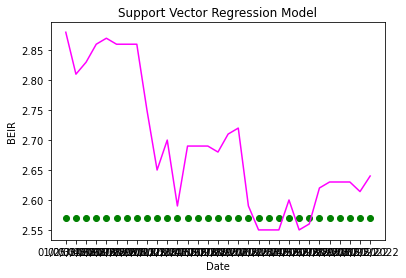

In [15]:
plt.plot(df_test.index, y_test, color = 'magenta')
plt.scatter(df_test.index, y_pred1, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('BEIR')
plt.show()

In [16]:
#Grid Search

from sklearn.model_selection import GridSearchCV

param = {'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

regressor = SVR()
regressor.fit(X,y)

grids = GridSearchCV(regressor,param,cv=5, scoring ='neg_root_mean_squared_error')

grids.fit(X_train,y_train)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale')},
             scoring='neg_root_mean_squared_error')

In [17]:
grids.cv_results_
grids.best_params_
grids.best_score_*-1

0.16387770463011417

In [18]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf',C = grids.best_params_['C'], coef0=grids.best_params_['coef0'],degree=grids.best_params_['degree'],gamma=grids.best_params_['gamma'])
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
y_pred1 = []

for i in y_pred:
    for j in i:
        y_pred1.append(j)

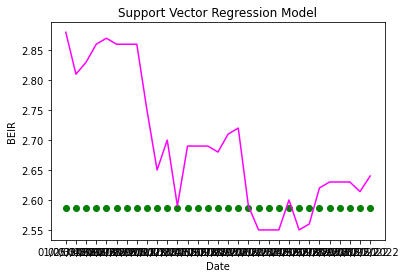

In [20]:
plt.plot(df_test.index, y_test, color = 'magenta')
plt.scatter(df_test.index, y_pred1, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('BEIR')
plt.show()

In [21]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)
metrics.mean_squared_error(y_test, y_pred1, squared = False)

0.15082733747351854

In [22]:
#Random Search

In [23]:
from sklearn.model_selection import RandomizedSearchCV

param = {'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

regressor = SVR()
regressor.fit(X,y)

random = RandomizedSearchCV(regressor,param,cv=5, n_jobs = -1, scoring ='neg_root_mean_squared_error',
                             random_state = 1)

random.fit(X_train,y_train)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [1, 5, 10],
                                        'coef0': [0.01, 10, 0.5],
                                        'degree': [3, 8],
                                        'gamma': ('auto', 'scale')},
                   random_state=1, scoring='neg_root_mean_squared_error')

In [24]:
random.cv_results_
random.best_params_
random.best_score_*-1

0.16387770463011417

In [25]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf',C = grids.best_params_['C'], coef0=grids.best_params_['coef0'],degree=grids.best_params_['degree'],gamma=grids.best_params_['gamma'])
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
y_pred1 = []

for i in y_pred:
    for j in i:
        y_pred1.append(j)

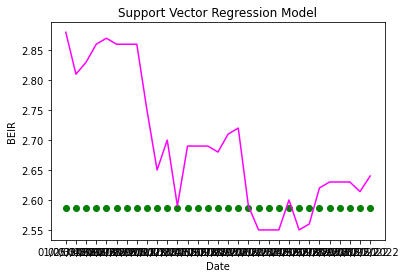

In [27]:
plt.plot(df_test.index, y_test, color = 'magenta')
plt.scatter(df_test.index, y_pred1, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('BEIR')
plt.show()

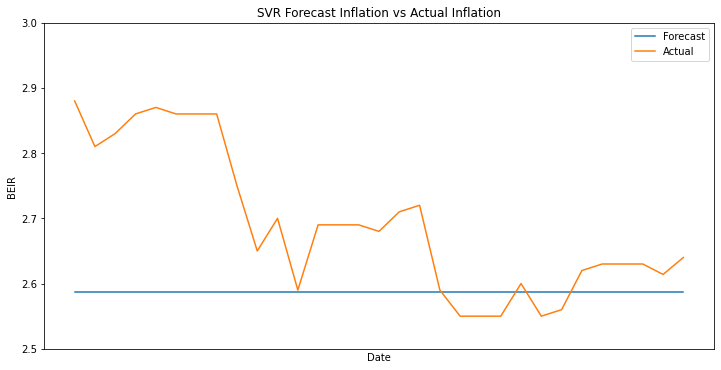

In [31]:
plt.figure(figsize=(12,6))
plt.plot(df_test.index, y_pred1, label = "Forecast")
# plotting the line 2 points 
plt.plot(df_test.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('BEIR')
# Set a title of the current axes.
plt.title('SVR Forecast Inflation vs Actual Inflation')
# show a legend on the plot
plt.legend()
plt.ylim(2.5,3)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# Display a figure.
plt.savefig("svr_forecast.png")
plt.show()

In [30]:
rmse = metrics.mean_squared_error(y_test, y_pred1, squared = False)
error = (rmse/np.mean(y_test))*100
print(rmse)
print(error)
#We see that the RMSE is quite low compared to the mean (6.6% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

0.15082733747351854
5.6053509742717935
